In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
plt.rcParams['figure.facecolor'] = 'white'
from numba import jit

In [367]:
def gather_universal(path: str,filetype: str)-> list:
    subdir=path

    data=[]
    for path, subdirs, files in os.walk(subdir):
        for name in files:
            if name.endswith(filetype)  :

                b=(str(os.path.join(path, name)))
                data.append(b)

                #print (str(os.path.join(path, name)))
    return data
def sort_on_last(list:list)->list:
    df=pd.DataFrame({'list': list})
    df['nums']=df['list'].apply(lambda x:x.split('_')[-1].split('.')[0])
    df['nums']=df.nums.astype(int)
    df.sort_values(by='nums',inplace=True)
    #display(df)
    return(np.array(df['list']))
@jit(nopython=True)
def clean_file(file):
        for num,line in enumerate(file):

            a=line.replace(',','.')
            a=a.replace('e-00','e-')
            a=a.replace('e-0','e-')
            a=a.replace('\n','')
            a=a.replace('\t\t\t\t','\t\t')
            file[num]=a


        return file
@jit(nopython=True)
def get_col_unit(file):
        cols=file[1].split('\t')
        units=file[2].split('\t')

        col_unit=[]
        for i,v in enumerate(cols):
            col_unit.append(v+' ['+units[i]+']')
        return(col_unit)
@jit(nopython=False)
def split_file(file,col_unit):
        splitfile=np.array(col_unit)
        for line in np.arange(3,len(file)):
            a=np.array(file[line].split('\t'),dtype=str)
            splitfile=np.vstack((splitfile,a))
        return(splitfile)
@jit(nopython=True)
def get_file(path)->list:

        file=[]
        with open(path, 'r') as reader:
             # Read and print the entire file line by line
            for line in reader:
                file.append(line)
        return(file)

def get_header(path)->list:
    with open(path, 'r') as reader:
        lines=reader.readlines()
        cleanline1=lines[1].replace('\n','').replace('\t\t\t\t','\t').split('\t')
        cleanline2=lines[2].replace('\n','').replace('\t\t\t\t','\t').split('\t')
        #display(len(cleanline2),len(cleanline1))
        col_unit=[]
        for i,v in enumerate(cleanline1):
            col_unit.append(v+' ['+cleanline2[i]+']')
        #display(col_unit)
        return(col_unit[:])

#get_header('data/MC_A6yii/Step_149.txt')
def manual_input(path:str)->pd.DataFrame:

    file=get_file(path)        #print(line, end='')
    file=clean_file(file)

    col_unit=get_col_unit(file)

    splitfile=split_file(file,col_unit)
    df=pd.DataFrame(data=splitfile[1:,:],columns=splitfile[0,:])
    display(df)
    df[df=='']=np.nan
    df=df.astype(np.float64)
    #%%
    display(df.columns)

    f=df.loc[:,['x []','y []','strains [strain_p1/strain]']]
    b=f.pivot(index='y []',columns='x []',values='strains [strain_p1/strain]')
    display(b)
    #%%
    plt.matshow(b)

In [368]:
def cleaner(filepath):
    fin = open(filepath, "rt")
    #read file contents to string
    data = fin.read()
    #replace all occurrences of the required string
    data = data.replace('\t\t\t\t', '\t\t')
    data = data.replace('e-00', 'e-')
    data = data.replace('e-0', 'e-')
    data = data.replace('e+00', 'e+')
    data = data.replace('e+0', 'e+')
    data = data.replace('.', '')
    data = data.replace(',', '.')
    #close the input file
    fin.close()
    #open the input file in write mode
    fin = open(filepath, "wt")
    #overrite the input file with the resulting data
    fin.write(data)
    #close the file
    fin.close()
def auto_input(path:str)->pd.DataFrame:

    df=pd.read_csv(path,header=None,skiprows=range(3),sep='\t',decimal='.',encoding='utf-8')

    df.columns=get_header(path)
    df.set_index(['x []','y []'],inplace=True)

    #display(df)
    return df


In [369]:
def get_p1(df):
    p1=df['strains [true_strain_p1/strain]'].reset_index().pivot(index='x []',columns='y []',values='strains [true_strain_p1/strain]').copy()
    return(p1)
def meanofslice(df):
    horizontalcount=10
    horizontalsize=int(len(df.columns)/horizontalcount)
    verticalsize=len(df.index)
    #display(horizontalsize,verticalsize)
    res=np.zeros(horizontalcount)
    #display(res)
    for i in range(horizontalcount):
        start=i*horizontalsize
        end=((i*horizontalsize)+horizontalsize)
        res[i]=np.nanmean(np.array(df.iloc[:,start:end]))
        #display(res[i])
        #display(i,df.iloc[:,start:end])
        #res[i]=np.mean(df.iloc[:,start:end])
    return(res)


In [370]:
names=sort_on_last(gather_universal('data/MC_A_6xi','.txt'))
display(names)

array(['data/MC_A_6xi\\Step_0.txt', 'data/MC_A_6xi\\Step_1.txt',
       'data/MC_A_6xi\\Step_2.txt', 'data/MC_A_6xi\\Step_3.txt',
       'data/MC_A_6xi\\Step_4.txt', 'data/MC_A_6xi\\Step_5.txt',
       'data/MC_A_6xi\\Step_6.txt', 'data/MC_A_6xi\\Step_7.txt',
       'data/MC_A_6xi\\Step_8.txt', 'data/MC_A_6xi\\Step_9.txt',
       'data/MC_A_6xi\\Step_10.txt', 'data/MC_A_6xi\\Step_11.txt',
       'data/MC_A_6xi\\Step_12.txt', 'data/MC_A_6xi\\Step_13.txt',
       'data/MC_A_6xi\\Step_14.txt', 'data/MC_A_6xi\\Step_15.txt',
       'data/MC_A_6xi\\Step_16.txt', 'data/MC_A_6xi\\Step_17.txt',
       'data/MC_A_6xi\\Step_18.txt', 'data/MC_A_6xi\\Step_19.txt',
       'data/MC_A_6xi\\Step_20.txt', 'data/MC_A_6xi\\Step_21.txt',
       'data/MC_A_6xi\\Step_22.txt', 'data/MC_A_6xi\\Step_23.txt',
       'data/MC_A_6xi\\Step_24.txt', 'data/MC_A_6xi\\Step_25.txt',
       'data/MC_A_6xi\\Step_26.txt', 'data/MC_A_6xi\\Step_27.txt',
       'data/MC_A_6xi\\Step_28.txt', 'data/MC_A_6xi\\Step_29.txt',
     

In [371]:
res=[]
force=[]
for name in names:
    cleaner(name)
    df=auto_input(name)
    display(name)
    p1=get_p1(df)
    meanarr=meanofslice(p1)
    res.append(meanarr)
    force.append(df.iloc[0,-2])
display(res)

'data/MC_A_6xi\\Step_0.txt'

'data/MC_A_6xi\\Step_1.txt'

'data/MC_A_6xi\\Step_2.txt'

'data/MC_A_6xi\\Step_3.txt'

'data/MC_A_6xi\\Step_4.txt'

'data/MC_A_6xi\\Step_5.txt'

'data/MC_A_6xi\\Step_6.txt'

'data/MC_A_6xi\\Step_7.txt'

'data/MC_A_6xi\\Step_8.txt'

'data/MC_A_6xi\\Step_9.txt'

'data/MC_A_6xi\\Step_10.txt'

'data/MC_A_6xi\\Step_11.txt'

'data/MC_A_6xi\\Step_12.txt'

'data/MC_A_6xi\\Step_13.txt'

'data/MC_A_6xi\\Step_14.txt'

'data/MC_A_6xi\\Step_15.txt'

'data/MC_A_6xi\\Step_16.txt'

'data/MC_A_6xi\\Step_17.txt'

'data/MC_A_6xi\\Step_18.txt'

'data/MC_A_6xi\\Step_19.txt'

'data/MC_A_6xi\\Step_20.txt'

'data/MC_A_6xi\\Step_21.txt'

'data/MC_A_6xi\\Step_22.txt'

'data/MC_A_6xi\\Step_23.txt'

'data/MC_A_6xi\\Step_24.txt'

'data/MC_A_6xi\\Step_25.txt'

'data/MC_A_6xi\\Step_26.txt'

'data/MC_A_6xi\\Step_27.txt'

'data/MC_A_6xi\\Step_28.txt'

'data/MC_A_6xi\\Step_29.txt'

'data/MC_A_6xi\\Step_30.txt'

'data/MC_A_6xi\\Step_31.txt'

'data/MC_A_6xi\\Step_32.txt'

'data/MC_A_6xi\\Step_33.txt'

'data/MC_A_6xi\\Step_34.txt'

'data/MC_A_6xi\\Step_35.txt'

'data/MC_A_6xi\\Step_36.txt'

'data/MC_A_6xi\\Step_37.txt'

'data/MC_A_6xi\\Step_38.txt'

'data/MC_A_6xi\\Step_39.txt'

'data/MC_A_6xi\\Step_40.txt'

'data/MC_A_6xi\\Step_41.txt'

'data/MC_A_6xi\\Step_42.txt'

'data/MC_A_6xi\\Step_43.txt'

'data/MC_A_6xi\\Step_44.txt'

'data/MC_A_6xi\\Step_45.txt'

'data/MC_A_6xi\\Step_46.txt'

'data/MC_A_6xi\\Step_47.txt'

'data/MC_A_6xi\\Step_48.txt'

'data/MC_A_6xi\\Step_49.txt'

'data/MC_A_6xi\\Step_50.txt'

'data/MC_A_6xi\\Step_51.txt'

'data/MC_A_6xi\\Step_52.txt'

'data/MC_A_6xi\\Step_53.txt'

'data/MC_A_6xi\\Step_54.txt'

'data/MC_A_6xi\\Step_55.txt'

'data/MC_A_6xi\\Step_56.txt'

'data/MC_A_6xi\\Step_57.txt'

'data/MC_A_6xi\\Step_58.txt'

'data/MC_A_6xi\\Step_59.txt'

'data/MC_A_6xi\\Step_60.txt'

'data/MC_A_6xi\\Step_61.txt'

'data/MC_A_6xi\\Step_62.txt'

'data/MC_A_6xi\\Step_63.txt'

'data/MC_A_6xi\\Step_64.txt'

'data/MC_A_6xi\\Step_65.txt'

'data/MC_A_6xi\\Step_66.txt'

'data/MC_A_6xi\\Step_67.txt'

'data/MC_A_6xi\\Step_68.txt'

'data/MC_A_6xi\\Step_69.txt'

'data/MC_A_6xi\\Step_70.txt'

'data/MC_A_6xi\\Step_71.txt'

'data/MC_A_6xi\\Step_72.txt'

'data/MC_A_6xi\\Step_73.txt'

'data/MC_A_6xi\\Step_74.txt'

'data/MC_A_6xi\\Step_75.txt'

'data/MC_A_6xi\\Step_76.txt'

'data/MC_A_6xi\\Step_77.txt'

'data/MC_A_6xi\\Step_78.txt'

'data/MC_A_6xi\\Step_79.txt'

'data/MC_A_6xi\\Step_80.txt'

'data/MC_A_6xi\\Step_81.txt'

'data/MC_A_6xi\\Step_82.txt'

'data/MC_A_6xi\\Step_83.txt'

'data/MC_A_6xi\\Step_84.txt'

'data/MC_A_6xi\\Step_85.txt'

'data/MC_A_6xi\\Step_86.txt'

'data/MC_A_6xi\\Step_87.txt'

'data/MC_A_6xi\\Step_88.txt'

'data/MC_A_6xi\\Step_89.txt'

'data/MC_A_6xi\\Step_90.txt'

'data/MC_A_6xi\\Step_91.txt'

'data/MC_A_6xi\\Step_92.txt'

'data/MC_A_6xi\\Step_93.txt'

'data/MC_A_6xi\\Step_94.txt'

'data/MC_A_6xi\\Step_95.txt'

'data/MC_A_6xi\\Step_96.txt'

'data/MC_A_6xi\\Step_97.txt'

'data/MC_A_6xi\\Step_98.txt'

'data/MC_A_6xi\\Step_99.txt'

'data/MC_A_6xi\\Step_100.txt'

'data/MC_A_6xi\\Step_101.txt'

'data/MC_A_6xi\\Step_102.txt'

'data/MC_A_6xi\\Step_103.txt'

'data/MC_A_6xi\\Step_104.txt'

'data/MC_A_6xi\\Step_105.txt'

'data/MC_A_6xi\\Step_106.txt'

'data/MC_A_6xi\\Step_107.txt'

'data/MC_A_6xi\\Step_108.txt'

'data/MC_A_6xi\\Step_109.txt'

'data/MC_A_6xi\\Step_110.txt'

'data/MC_A_6xi\\Step_111.txt'

'data/MC_A_6xi\\Step_112.txt'

'data/MC_A_6xi\\Step_113.txt'

'data/MC_A_6xi\\Step_114.txt'

'data/MC_A_6xi\\Step_115.txt'

'data/MC_A_6xi\\Step_116.txt'

'data/MC_A_6xi\\Step_117.txt'

'data/MC_A_6xi\\Step_118.txt'

'data/MC_A_6xi\\Step_119.txt'

'data/MC_A_6xi\\Step_120.txt'

'data/MC_A_6xi\\Step_121.txt'

'data/MC_A_6xi\\Step_122.txt'

'data/MC_A_6xi\\Step_123.txt'

'data/MC_A_6xi\\Step_124.txt'

'data/MC_A_6xi\\Step_125.txt'

'data/MC_A_6xi\\Step_126.txt'

'data/MC_A_6xi\\Step_127.txt'

'data/MC_A_6xi\\Step_128.txt'

'data/MC_A_6xi\\Step_129.txt'

'data/MC_A_6xi\\Step_130.txt'

'data/MC_A_6xi\\Step_131.txt'

'data/MC_A_6xi\\Step_132.txt'

'data/MC_A_6xi\\Step_133.txt'

'data/MC_A_6xi\\Step_134.txt'

'data/MC_A_6xi\\Step_135.txt'

'data/MC_A_6xi\\Step_136.txt'

'data/MC_A_6xi\\Step_137.txt'

'data/MC_A_6xi\\Step_138.txt'

'data/MC_A_6xi\\Step_139.txt'

'data/MC_A_6xi\\Step_140.txt'

'data/MC_A_6xi\\Step_141.txt'

'data/MC_A_6xi\\Step_142.txt'

'data/MC_A_6xi\\Step_143.txt'

'data/MC_A_6xi\\Step_144.txt'

'data/MC_A_6xi\\Step_145.txt'

'data/MC_A_6xi\\Step_146.txt'

'data/MC_A_6xi\\Step_147.txt'

'data/MC_A_6xi\\Step_148.txt'

'data/MC_A_6xi\\Step_149.txt'

'data/MC_A_6xi\\Step_150.txt'

'data/MC_A_6xi\\Step_151.txt'

'data/MC_A_6xi\\Step_152.txt'

'data/MC_A_6xi\\Step_153.txt'

'data/MC_A_6xi\\Step_154.txt'

'data/MC_A_6xi\\Step_155.txt'

'data/MC_A_6xi\\Step_156.txt'

'data/MC_A_6xi\\Step_157.txt'

'data/MC_A_6xi\\Step_158.txt'

'data/MC_A_6xi\\Step_159.txt'

'data/MC_A_6xi\\Step_160.txt'

'data/MC_A_6xi\\Step_161.txt'

'data/MC_A_6xi\\Step_162.txt'

'data/MC_A_6xi\\Step_163.txt'

'data/MC_A_6xi\\Step_164.txt'

'data/MC_A_6xi\\Step_165.txt'

'data/MC_A_6xi\\Step_166.txt'

'data/MC_A_6xi\\Step_167.txt'

'data/MC_A_6xi\\Step_168.txt'

'data/MC_A_6xi\\Step_169.txt'

'data/MC_A_6xi\\Step_170.txt'

'data/MC_A_6xi\\Step_171.txt'

'data/MC_A_6xi\\Step_172.txt'

'data/MC_A_6xi\\Step_173.txt'

'data/MC_A_6xi\\Step_174.txt'

'data/MC_A_6xi\\Step_175.txt'

'data/MC_A_6xi\\Step_176.txt'

'data/MC_A_6xi\\Step_177.txt'

'data/MC_A_6xi\\Step_178.txt'

'data/MC_A_6xi\\Step_179.txt'

'data/MC_A_6xi\\Step_180.txt'

'data/MC_A_6xi\\Step_181.txt'

'data/MC_A_6xi\\Step_182.txt'

'data/MC_A_6xi\\Step_183.txt'

'data/MC_A_6xi\\Step_184.txt'

'data/MC_A_6xi\\Step_185.txt'

'data/MC_A_6xi\\Step_186.txt'

'data/MC_A_6xi\\Step_187.txt'

'data/MC_A_6xi\\Step_188.txt'

'data/MC_A_6xi\\Step_189.txt'

'data/MC_A_6xi\\Step_190.txt'

'data/MC_A_6xi\\Step_191.txt'

'data/MC_A_6xi\\Step_192.txt'

'data/MC_A_6xi\\Step_193.txt'

'data/MC_A_6xi\\Step_194.txt'

'data/MC_A_6xi\\Step_195.txt'

'data/MC_A_6xi\\Step_196.txt'

'data/MC_A_6xi\\Step_197.txt'

'data/MC_A_6xi\\Step_198.txt'

'data/MC_A_6xi\\Step_199.txt'

'data/MC_A_6xi\\Step_200.txt'

'data/MC_A_6xi\\Step_201.txt'

'data/MC_A_6xi\\Step_202.txt'

'data/MC_A_6xi\\Step_203.txt'

'data/MC_A_6xi\\Step_204.txt'

'data/MC_A_6xi\\Step_205.txt'

'data/MC_A_6xi\\Step_206.txt'

'data/MC_A_6xi\\Step_207.txt'

'data/MC_A_6xi\\Step_208.txt'

'data/MC_A_6xi\\Step_209.txt'

'data/MC_A_6xi\\Step_210.txt'

'data/MC_A_6xi\\Step_211.txt'

'data/MC_A_6xi\\Step_212.txt'

'data/MC_A_6xi\\Step_213.txt'

'data/MC_A_6xi\\Step_214.txt'

'data/MC_A_6xi\\Step_215.txt'

'data/MC_A_6xi\\Step_216.txt'

'data/MC_A_6xi\\Step_217.txt'

'data/MC_A_6xi\\Step_218.txt'

'data/MC_A_6xi\\Step_219.txt'

'data/MC_A_6xi\\Step_220.txt'

'data/MC_A_6xi\\Step_221.txt'

'data/MC_A_6xi\\Step_222.txt'

'data/MC_A_6xi\\Step_223.txt'

'data/MC_A_6xi\\Step_224.txt'

'data/MC_A_6xi\\Step_225.txt'

'data/MC_A_6xi\\Step_226.txt'

'data/MC_A_6xi\\Step_227.txt'

'data/MC_A_6xi\\Step_228.txt'

'data/MC_A_6xi\\Step_229.txt'

'data/MC_A_6xi\\Step_230.txt'

'data/MC_A_6xi\\Step_231.txt'

'data/MC_A_6xi\\Step_232.txt'

'data/MC_A_6xi\\Step_233.txt'

'data/MC_A_6xi\\Step_235.txt'

'data/MC_A_6xi\\Step_236.txt'

'data/MC_A_6xi\\Step_237.txt'

'data/MC_A_6xi\\Step_238.txt'

'data/MC_A_6xi\\Step_239.txt'

'data/MC_A_6xi\\Step_240.txt'

'data/MC_A_6xi\\Step_241.txt'

'data/MC_A_6xi\\Step_242.txt'

'data/MC_A_6xi\\Step_243.txt'

'data/MC_A_6xi\\Step_244.txt'

'data/MC_A_6xi\\Step_245.txt'

'data/MC_A_6xi\\Step_246.txt'

'data/MC_A_6xi\\Step_247.txt'

'data/MC_A_6xi\\Step_248.txt'

'data/MC_A_6xi\\Step_249.txt'

'data/MC_A_6xi\\Step_250.txt'

'data/MC_A_6xi\\Step_251.txt'

'data/MC_A_6xi\\Step_252.txt'

'data/MC_A_6xi\\Step_253.txt'

'data/MC_A_6xi\\Step_254.txt'

'data/MC_A_6xi\\Step_255.txt'

'data/MC_A_6xi\\Step_256.txt'

'data/MC_A_6xi\\Step_257.txt'

'data/MC_A_6xi\\Step_258.txt'

'data/MC_A_6xi\\Step_259.txt'

'data/MC_A_6xi\\Step_260.txt'

'data/MC_A_6xi\\Step_261.txt'

'data/MC_A_6xi\\Step_262.txt'

'data/MC_A_6xi\\Step_263.txt'

'data/MC_A_6xi\\Step_264.txt'

'data/MC_A_6xi\\Step_265.txt'

'data/MC_A_6xi\\Step_266.txt'

'data/MC_A_6xi\\Step_267.txt'

'data/MC_A_6xi\\Step_268.txt'

'data/MC_A_6xi\\Step_269.txt'

'data/MC_A_6xi\\Step_270.txt'

'data/MC_A_6xi\\Step_271.txt'

'data/MC_A_6xi\\Step_272.txt'

'data/MC_A_6xi\\Step_273.txt'

'data/MC_A_6xi\\Step_274.txt'

'data/MC_A_6xi\\Step_275.txt'

'data/MC_A_6xi\\Step_276.txt'

'data/MC_A_6xi\\Step_277.txt'

'data/MC_A_6xi\\Step_278.txt'

'data/MC_A_6xi\\Step_279.txt'

'data/MC_A_6xi\\Step_280.txt'

'data/MC_A_6xi\\Step_281.txt'

'data/MC_A_6xi\\Step_282.txt'

'data/MC_A_6xi\\Step_283.txt'

'data/MC_A_6xi\\Step_284.txt'

'data/MC_A_6xi\\Step_285.txt'

[array([154849.02783879, 272301.61506749, 257557.07088454, 270407.78004397,
        237793.98555632, 250016.72608696, 317840.7815853 , 346292.11336032,
        271004.01619433, 276184.25120345]),
 array([0.00413434, 0.00611466, 0.00548657, 0.00598326, 0.00600923,
        0.01837317, 0.03259901, 0.03682325, 0.01474822, 0.00696159]),
 array([0.00390221, 0.00620768, 0.00531003, 0.00606969, 0.00590123,
        0.01814007, 0.03260519, 0.0368947 , 0.01491127, 0.00655729]),
 array([1.69753247e+35, 5.80738683e-03, 5.42832306e-03, 6.35814840e-03,
        5.74168067e-03, 1.82462503e-02, 3.28485205e-02, 3.68216849e-02,
        1.49808658e-02, 6.45577614e-03]),
 array([0.00364081, 0.00600764, 0.00559816, 0.00566737, 0.00613309,
        0.01833724, 0.03289969, 0.03713373, 0.01455544, 0.00678755]),
 array([0.00404249, 0.00587816, 0.0051558 , 0.00547666, 0.00622901,
        0.01816824, 0.03312787, 0.03659166, 0.01473724, 0.0065081 ]),
 array([0.00404756, 0.00592337, 0.00558661, 0.00572691, 0.00606802

In [372]:
ap=pd.DataFrame(res)
display(ap)
#display(force)

,0,1,2,3,4,5,6,7,8,9
0,1.548490e+05,272301.615067,257557.070885,270407.780044,237793.985556,250016.726087,317840.781585,346292.113360,271004.016194,276184.251203
1,4.134345e-03,0.006115,0.005487,0.005983,0.006009,0.018373,0.032599,0.036823,0.014748,0.006962
2,3.902205e-03,0.006208,0.005310,0.006070,0.005901,0.018140,0.032605,0.036895,0.014911,0.006557
3,1.697532e+35,0.005807,0.005428,0.006358,0.005742,0.018246,0.032849,0.036822,0.014981,0.006456
4,3.640812e-03,0.006008,0.005598,0.005667,0.006133,0.018337,0.032900,0.037134,0.014555,0.006788
...,...,...,...,...,...,...,...,...,...,...
280,5.768788e-03,0.005352,0.004936,0.004541,0.004993,0.005959,0.035304,0.021814,0.006158,0.005199
281,5.786295e-03,0.005332,0.004215,0.004374,0.004528,0.006131,0.036268,0.021659,0.006190,0.005496
282,5.658280e-03,0.005229,0.004519,0.004579,0.004429,0.006032,0.035887,0.021905,0.006282,0.005010
283,5.765362e-03,0.004716,0.004247,0.004366,0.005338,0.006066,0.036107,0.022069,0.005840,0.005506


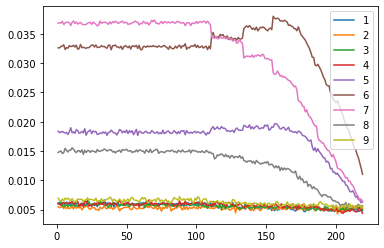

In [373]:
for i in range(1,10):
    plt.plot(ap.iloc[1:220,i],label=i)
plt.legend()
plt.show()

